In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
population = pd.read_csv(
    filepath_or_buffer = "../data/행정안전부_지역별(행정동) 성별 연령별 주민등록 인구수_20240531.csv", 
    encoding = "cp949"
    )
pop_gyeongn = population[population["시도명"] == "경상남도"].drop(columns=["기준연월"])

In [3]:
pop_gyeongn["행정기관코드"] = pop_gyeongn["행정기관코드"].apply(lambda x: str(x)[:-2])

#### 인구 수 데이터 전처리 

In [4]:
### 남
pop_gyeongn["유아남"] = pop_gyeongn.loc[:, "0세남자":"7세남자"].sum(axis=1)
pop_gyeongn["초등학생남"] = pop_gyeongn.loc[:, "8세남자":"13세남자"].sum(axis=1)
pop_gyeongn["중학생남"] = pop_gyeongn.loc[:, "14세남자":"16세남자"].sum(axis=1)
pop_gyeongn["고등학생남"] = pop_gyeongn.loc[:, "17세남자":"19세남자"].sum(axis=1)
pop_gyeongn["20대남"] = pop_gyeongn.loc[:, "20세남자":"29세남자"].sum(axis=1)
pop_gyeongn["30대남"] = pop_gyeongn.loc[:, "30세남자":"39세남자"].sum(axis=1)
pop_gyeongn["40대남"] = pop_gyeongn.loc[:, "40세남자":"49세남자"].sum(axis=1)
pop_gyeongn["50대남"] = pop_gyeongn.loc[:, "50세남자":"59세남자"].sum(axis=1)
pop_gyeongn["노인남"] = pop_gyeongn.loc[:, "60세남자":"110세이상 남자"].sum(axis=1)
### 여
pop_gyeongn["유아여"] = pop_gyeongn.loc[:, "0세여자":"7세여자"].sum(axis=1)
pop_gyeongn["초등학생여"] = pop_gyeongn.loc[:, "8세여자":"13세여자"].sum(axis=1)
pop_gyeongn["중학생여"] = pop_gyeongn.loc[:, "14세여자":"16세여자"].sum(axis=1)
pop_gyeongn["고등학생여"] = pop_gyeongn.loc[:, "17세여자":"19세여자"].sum(axis=1)
pop_gyeongn["20대여"] = pop_gyeongn.loc[:, "20세여자":"29세여자"].sum(axis=1)
pop_gyeongn["30대여"] = pop_gyeongn.loc[:, "30세여자":"39세여자"].sum(axis=1)
pop_gyeongn["40대여"] = pop_gyeongn.loc[:, "40세여자":"49세여자"].sum(axis=1)
pop_gyeongn["50대여"] = pop_gyeongn.loc[:, "50세여자":"59세여자"].sum(axis=1)
pop_gyeongn["노인여"] = pop_gyeongn.loc[:, "60세여자":"110세이상 여자"].sum(axis=1)
### 합계
pop_gyeongn["유아"] = pop_gyeongn.loc[:, ["유아남", "유아여"]].sum(axis=1)
pop_gyeongn["초등학생"] = pop_gyeongn.loc[:, ["초등학생남", "초등학생여"]].sum(axis=1)
pop_gyeongn["중학생"] = pop_gyeongn.loc[:, ["중학생남", "중학생여"]].sum(axis=1)
pop_gyeongn["고등학생"] = pop_gyeongn.loc[:, ["고등학생남", "고등학생여"]].sum(axis=1)
pop_gyeongn["20대"] = pop_gyeongn.loc[:, ["20대남", "20대여"]].sum(axis=1)
pop_gyeongn["30대"] = pop_gyeongn.loc[:, ["30대남", "30대여"]].sum(axis=1)
pop_gyeongn["40대"] = pop_gyeongn.loc[:, ["40대남", "40대여"]].sum(axis=1)
pop_gyeongn["50대"] = pop_gyeongn.loc[:, ["50대남", "50대여"]].sum(axis=1)
pop_gyeongn["노인"] = pop_gyeongn.loc[:, ["노인남", "노인여"]].sum(axis=1)

#### 주소 데이터 통합 전처리

In [5]:
pop_gyeongn["시도_시군구_읍면동명"] = pop_gyeongn.apply(lambda row: row["시도명"] + " " + row["시군구명"] + " " + row["읍면동명"], axis=1)

In [6]:
use_columns = [
    "행정기관코드", 
    "시도_시군구_읍면동명", 
    "계", 
    "남자", 
    "여자", 
    "유아", 
    "초등학생", 
    "중학생", 
    "고등학생", 
    "20대", 
    "30대", 
    "40대", 
    "50대", 
    "노인"
    ]

pop_gyeongn = pop_gyeongn[use_columns]

In [7]:
pop_gyeongn.head()

,행정기관코드,시도_시군구_읍면동명,계,남자,여자,유아,초등학생,중학생,고등학생,20대,30대,40대,50대,노인
2823,48121250,경상남도 창원시 의창구 동읍,18654,9539,9115,463,814,493,496,1800,1562,2398,4031,6597
2824,48121310,경상남도 창원시 의창구 북면,43128,21637,21491,3759,4073,1419,901,2805,6255,8457,6037,9422
2825,48121320,경상남도 창원시 의창구 대산면,6726,3404,3322,126,160,106,103,434,528,679,1184,3406
2826,48121510,경상남도 창원시 의창구 의창동,49012,24666,24346,2531,2893,1391,1256,5398,6263,7642,9423,12215
2827,48121520,경상남도 창원시 의창구 팔룡동,25343,12910,12433,1266,1283,746,755,3391,3517,3956,5250,5179


### 버스 정류장 위치 데이터

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["figure.figsize"] = (10, 10)

In [30]:
## 읍면동 공간데이터 불러오기
emd = gpd.read_file(
    "../data/emd_20230729/emd.shp", 
    encoding="cp949", 
    )

## 읍면동 경상남도 추출
emd = emd[emd["EMD_CD"].apply(lambda x: x[:2] == "48")]

## crs값 설정
emd = emd.set_crs(crs="EPSG:5179")
# emd = emd.to_crs(epsg=4326)

In [31]:
print(emd.crs)

EPSG:5179


In [104]:
## 정류장 데이터 불러오기
bus_stop = pd.read_csv("../data/국토교통부_전국 버스정류장 위치정보_20231016.csv", encoding="cp949")

## 경남만 불러오기
bus_stop = bus_stop[bus_stop["도시명"].apply(lambda x: True if "경상남도" in x else False)]

## 이상치 및 결측치 처리
bus_stop = bus_stop.drop(index=94785)
bus_stop.loc[140553, "위도"] = 34.927810
bus_stop.loc[140553, "경도"] = 128.06807
bus_stop.loc[140554, "위도"] = 34.927663
bus_stop.loc[140554, "경도"] = 128.06838

## geo data 형태로 변형
bus_stop = gpd.GeoDataFrame(
    bus_stop, 
    geometry=gpd.points_from_xy(bus_stop['경도'], bus_stop['위도'])
    )

## crs값 설정
bus_stop = bus_stop.set_crs(crs="EPSG:4326")
bus_stop = bus_stop.to_crs(epsg=5179)

In [ ]:
print(bus_stop.crs)

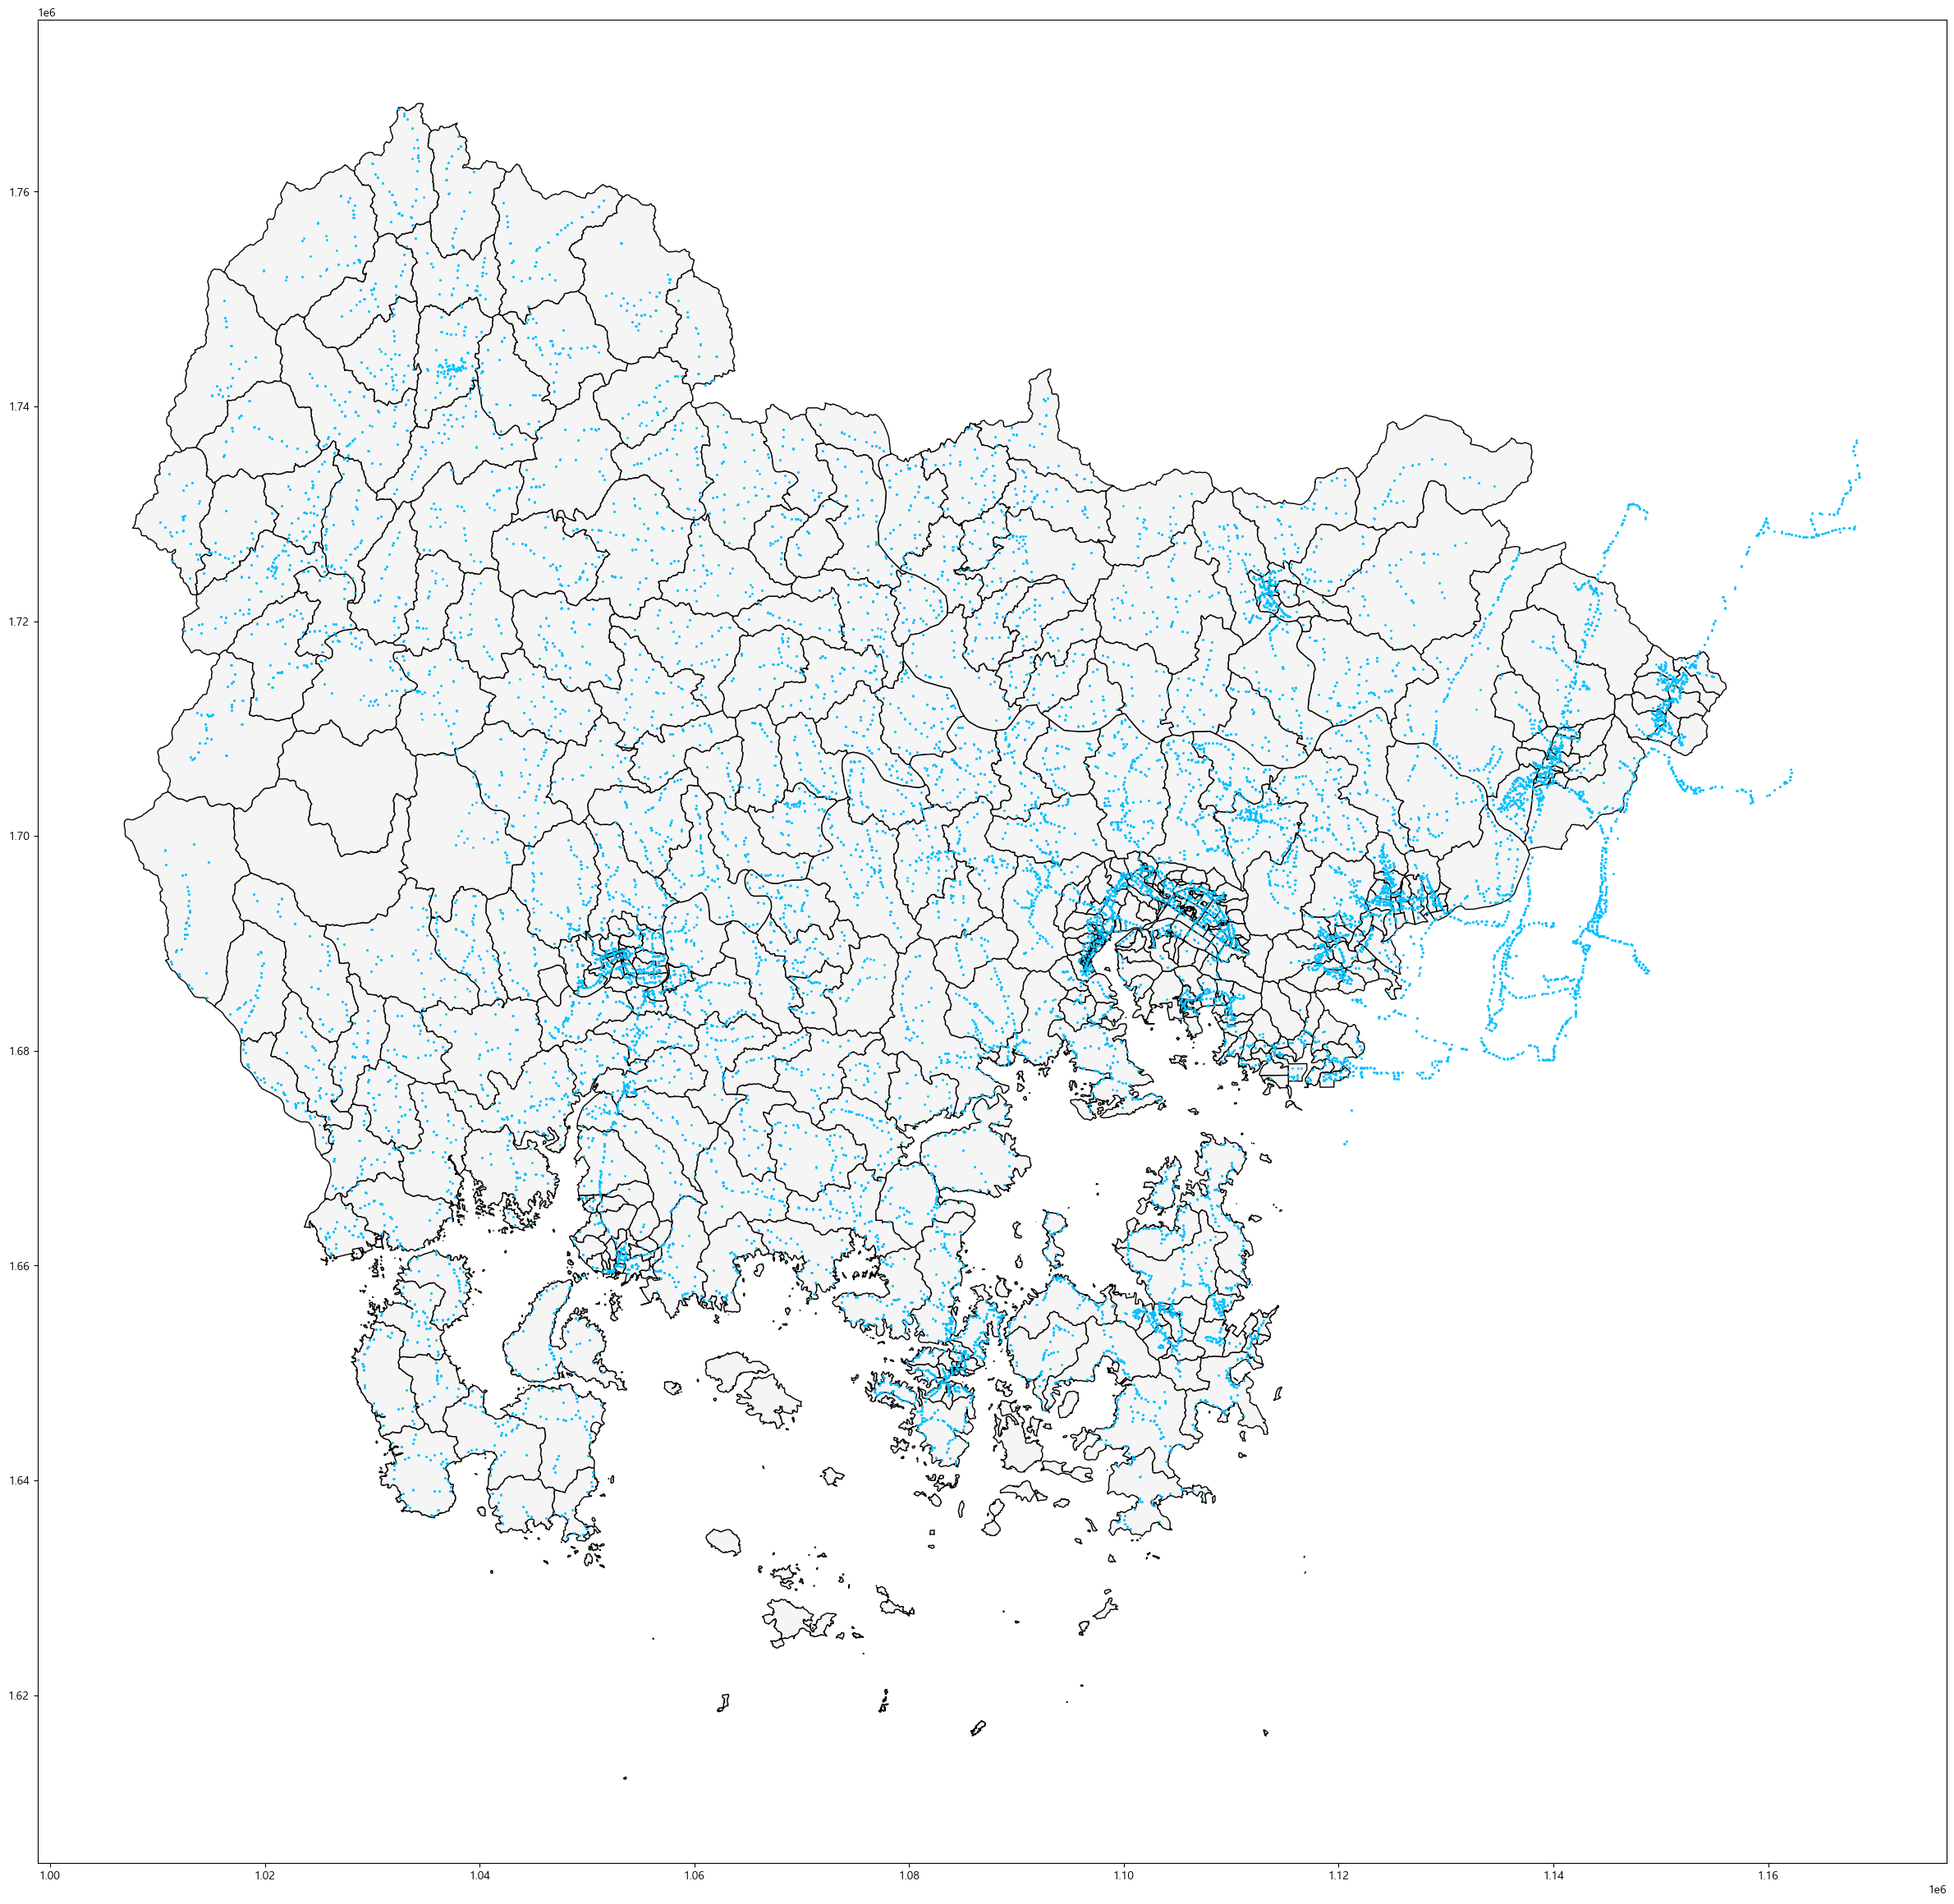

In [108]:
## 읍면동 틀 그리기
ax = emd.plot(
    figsize = (30, 30), 
    color = "whitesmoke", 
    edgecolor = "black", 
    linewidth = 1,
    column = "EMD_KOR_NM",
    legend = True, 
    categorical = True
)

## 버스 정류장 위치 확인
bus_stop.plot(
    ax = ax, 
    color = "deepskyblue", 
    markersize = 1
)
plt.show()